# Combining Classifiers
In this project I'm going to use ensemble(majority voting/hard voting and soft voting) of different classifiers and see if the outcome(predictions) are better with or without ensemble. Plus I'm going to undersample a dataset to have better results

## Dataset
For this problem I will work with the Personal Key Indicators of Heart Disease dataset. 

- What topic does the dataset cover?

According to the CDC, heart disease is one of the leading causes of death for people of most races in the US (African Americans, American Indians and Alaska Natives, and white people). About half of all Americans (47%) have at least 1 of 3 key risk factors for heart disease: high blood pressure, high cholesterol, and smoking. Other key indicator include diabetic status, obesity (high BMI), not getting enough physical activity or drinking too much alcohol. Detecting and preventing the factors that have the greatest impact on heart disease is very important in healthcare. Computational developments, in turn, allow the application of machine learning methods to detect "patterns" from the data that can predict a patient's condition.

- Where did the dataset come from and what treatments did it undergo?

Originally, the dataset come from the CDC and is a major part of the Behavioral Risk Factor Surveillance System (BRFSS), which conducts annual telephone surveys to gather data on the health status of U.S. residents. As the CDC describes: "Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.". The most recent dataset (as of February 15, 2022) includes data from 2020. It consists of 401,958 rows and 279 columns. The vast majority of columns are questions asked to respondents about their health status, such as "Do you have serious difficulty walking or climbing stairs?" or "Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes]". In this dataset, I noticed many different factors (questions) that directly or indirectly influence heart disease, so I decided to select the most relevant variables from it and do some cleaning so that it would be usable for machine learning projects.

- What can you do with this dataset?

As described above, the original dataset of nearly 300 variables was reduced to just about 20 variables. In addition to classical EDA, this dataset can be used to apply a range of machine learning methods, most notably classifier models (logistic regression, SVM, random forest, etc.). You should treat the variable "HeartDisease" as a binary ("Yes" - respondent had heart disease; "No" - respondent had no heart disease). But note that classes are not balanced, so the classic model application approach is not advisable. Fixing the weights/undersampling should yield significantly betters results.

## ML algorithms

### KNN (K-Nearest Neighbors) Algorithm

KNN algorithm is one of the simples and easiest to implement supervised ML algorithms. It can be used for classification and regression problems. The KNN algorithm works on assuming that similar things with similar features are in close proximity to each other. The value of k when working with this algorithm is too important. To get the best value for k, usually ML Engineers get the number of entries in the dataset(n) and sqrt it, so k = sqrt(n). So for values of k closer to 1 we get less stable predictions, because in general KNN works as majority voting. So with increasing the values of K we are going to get better results to a certain point when the results will start to get worse. The bad thing for this algorithm in general is because it's slower compared to other algorithms. Because it's slower this algorithm works better with smaller datasets

### Decision Tree Algorithm (explanation only for Random Forest Algorithm)

Decision Tree Algorithm is one of the most simples algorithm that is in use in the Machine Learning. It it a basis for most other ML algorithm like Random Tree and Random Forest. The idea is simple, it starts with the feature that plays a big role in the classifing and braches out using other features. Basically it's answering the questions with yes or no(1 or 0). This is a typical algorithm used for classification problems. 

### Random Forest Algorithm

The idea for the Random Forest Algorithm is quite interesting and powerful. Random Forest uses many trees in combination so it can get the right conclussion or with other words: A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models. The low correlation between models is the key. Uncorrelated models can produce ensemble predictions that are more accurate than any of the individual predictions. The reason for this wonderful effect is that the trees protect each other from their individual errors.

### Naive Bayes Algorithm
Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem. Using Bayes theorem, we can find the probability of A happening, given that B has occurred. Here, B is the evidence and A is the hypothesis. The assumption made here is that the predictors/features are independent. That is presence of one particular feature does not affect the other. Hence it is called naive. There are basically 3 types of naive bayes: Multinomial Naive Bayes for basic classfication problems, Bernoulli Naive Bayes  is similar to the multinomial naive bayes but the predictors are boolean variables and Gaussian Naive Bayes when the predictors take up a continuous value and are not discrete, we assume that these values are sampled from a gaussian distribution

### XGBoost Algorithm
XGBoost is an implementation of gradient boosted decision trees designed for speed and performance. Generally, XGBoost is fast. Really fast when compared to other implementations of gradient boosting. XGBoost can be used for classification and regression problems. It's extremely popular for competitions. This algorithm goes by lots of different names such as gradient boosting, multiple additive regression trees, stochastic gradient boosting or gradient boosting machines. Boosting is an ensemble technique where new models are added to correct the errors made by existing models. Models are added sequentially until no further improvements can be made. A popular example is the AdaBoost algorithm that weights data points that are hard to predict. Gradient boosting is an approach where new models are created that predict the residuals or errors of prior models and then added together to make the final prediction. It is called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

## Loading Data, Exploration and Clearing

In [1]:
# importing the libraries for working with data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading the dataset and looking at the first 10 rows
df = pd.read_csv('./heart.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [3]:
# Seeing the shape of the dataset(number of rows and columns)
df.shape

(319795, 18)

In [4]:
# Seeing the names of the columns + looking for null values
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [5]:
# More information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Usually I want to have the class as the last column in the dataframe so we are going to change it

In [6]:
# Changing the order of the columns
new_cols = []
for col in df.columns:
    new_cols.append(col.replace(' ', '_'))
new_cols[0], new_cols[-1] = new_cols[-1], new_cols[0]
new_cols[0], new_cols[1] = new_cols[1], new_cols[0]
df_new = df[new_cols]
df_new.head(10)

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,HeartDisease
0,16.60,Yes,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,No
1,20.34,No,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,26.58,No,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,24.21,Yes,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,No
4,23.71,No,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,28.87,No,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,Yes
6,21.63,Yes,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,No
7,31.64,No,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,26.45,No,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,40.69,No,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [7]:
# To see all the values for AgeCategory so I can transform it to numeric
print(df_new.AgeCategory.unique())
print(df_new.Race.unique())
print(df_new.GenHealth.unique())
print(df_new.Diabetic.unique())

['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']


In [8]:
# Want to transform all the yes/no into values of 1/0, etc.
listt = ['SkinCancer', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'HeartDisease']
for ele in listt:
    df_new[ele] = df_new[ele].map({'Yes': 1, 'No': 0})
df_new['Sex'] = df_new['Sex'].map({'Female': 0, 'Male': 1})
df_new['Race'] = df_new['Race'].map({'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Other': 4, 'Hispanic': 5})
df_new['GenHealth'] = df_new['GenHealth'].map({'Very good':0, 'Fair':1 ,'Good':2 ,'Poor':3 ,'Excellent':4})
df_new['AgeCategory'] = df_new['AgeCategory'].map({'55-59':7, '80 or older':12, '65-69':9, '75-79':11, '40-44':4, '70-74':10, '60-64':8, '50-54':6,'45-49':5, '18-24':0, '35-39':3, '30-34':2, '25-29':1})
df_new['Diabetic'] = df_new['Diabetic'].map({'Yes': 1 ,'No': 0 ,'No, borderline diabetes':2, 'Yes (during pregnancy)':3})
df_new.head(5)

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,HeartDisease
0,16.60,1,1,0,0,3.0,30.0,0,0,7,0,1,1,0,5.0,1,0,0
1,20.34,0,0,0,1,0.0,0.0,0,0,12,0,0,1,0,7.0,0,0,0
2,26.58,0,1,0,0,20.0,30.0,0,1,9,0,1,1,1,8.0,1,0,0
3,24.21,1,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,0
4,23.71,0,0,0,0,28.0,0.0,1,0,4,0,0,1,0,8.0,0,0,0


In [9]:
# Some statistical features for the dataset
df_new.describe()

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,HeartDisease
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,0.093244,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,0.736794,0.194002,0.775362,1.632827,7.097075,0.134061,0.036833,0.085595
std,6.356100,0.290775,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.571156,0.496776,0.417344,1.506362,1.436007,0.340718,0.188352,0.279766
min,12.020000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,24.030000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,27.340000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,31.420000,0.000000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,0.000000,0.000000,1.000000,2.000000,8.000000,0.000000,0.000000,0.000000
max,94.850000,1.000000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [10]:
# Looking at the classes that they aren't balanced
heart_prob = df_new.HeartDisease.value_counts()[1]
heart_no_prob = df_new.HeartDisease.value_counts()[0]
print('Number of people with heart disease: ', heart_prob)
print('Number of people without heart disease: ', heart_no_prob)
print('Number of people in the dataset: ', df_new.shape[0])
print('Probability of heart disease: ', heart_prob/df_new.shape[0]*100)
print('Probability of no heart disease: ', heart_no_prob/df_new.shape[0]*100)

Number of people with heart disease:  27373
Number of people without heart disease:  292422
Number of people in the dataset:  319795
Probability of heart disease:  8.559545959130068
Probability of no heart disease:  91.44045404086994


## Data Visualisation

<BarContainer object of 2 artists>

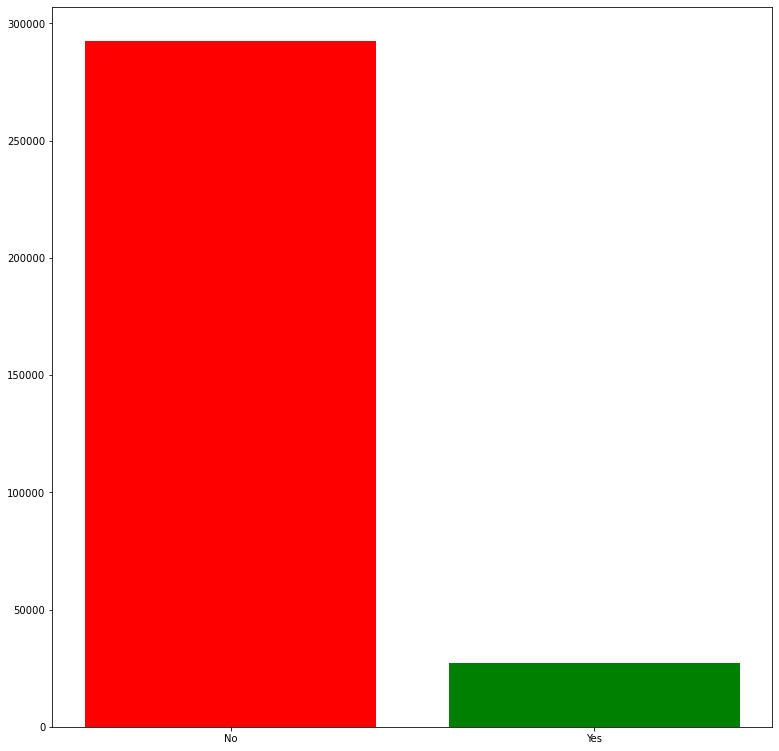

In [11]:
# Looking at the number of people with and without heart disease
fig = plt.figure(figsize=(10, 10))
fig.add_axes([1.0, 1.0, 1.0, 1.0])
plt.bar(['No', 'Yes'], df_new.HeartDisease.value_counts(), color=['red', 'green'])

<BarContainer object of 4 artists>

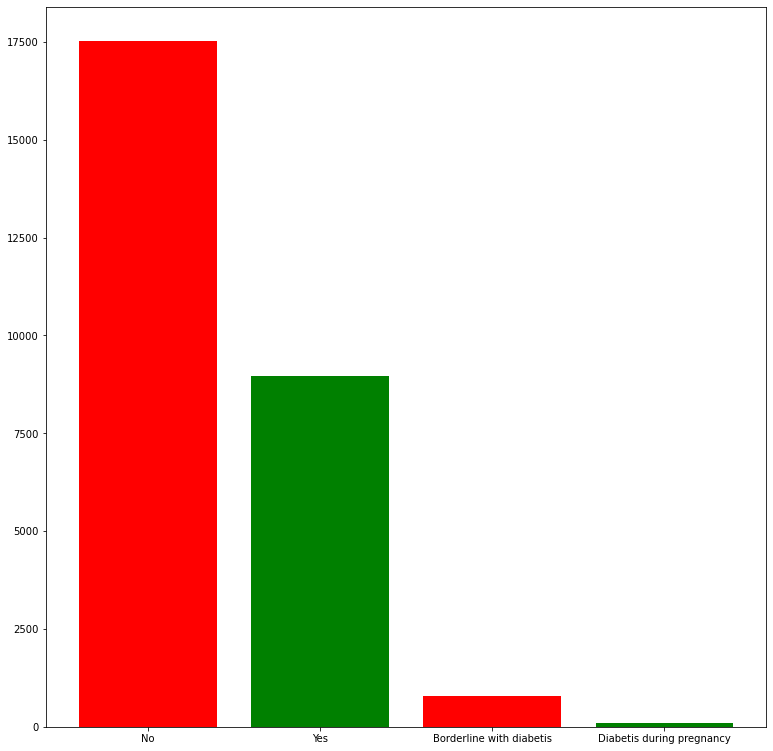

In [12]:
# Diabetis and people that have heart disease
diabetis = df_new[df_new.HeartDisease == 1].Diabetic.value_counts()[1]
no_diabetis = df_new[df_new.HeartDisease == 1].Diabetic.value_counts()[0]
borderline = df_new[df_new.HeartDisease == 1].Diabetic.value_counts()[2]
pregnancy = df_new[df_new.HeartDisease == 1].Diabetic.value_counts()[3]
fig = plt.figure(figsize=(10, 10))
fig.add_axes([1.0, 1.0, 1.0, 1.0])
plt.bar(['No', 'Yes', 'Borderline with diabetis', 'Diabetis during pregnancy'], [no_diabetis, diabetis, borderline, pregnancy], color=['red', 'green'])

<BarContainer object of 6 artists>

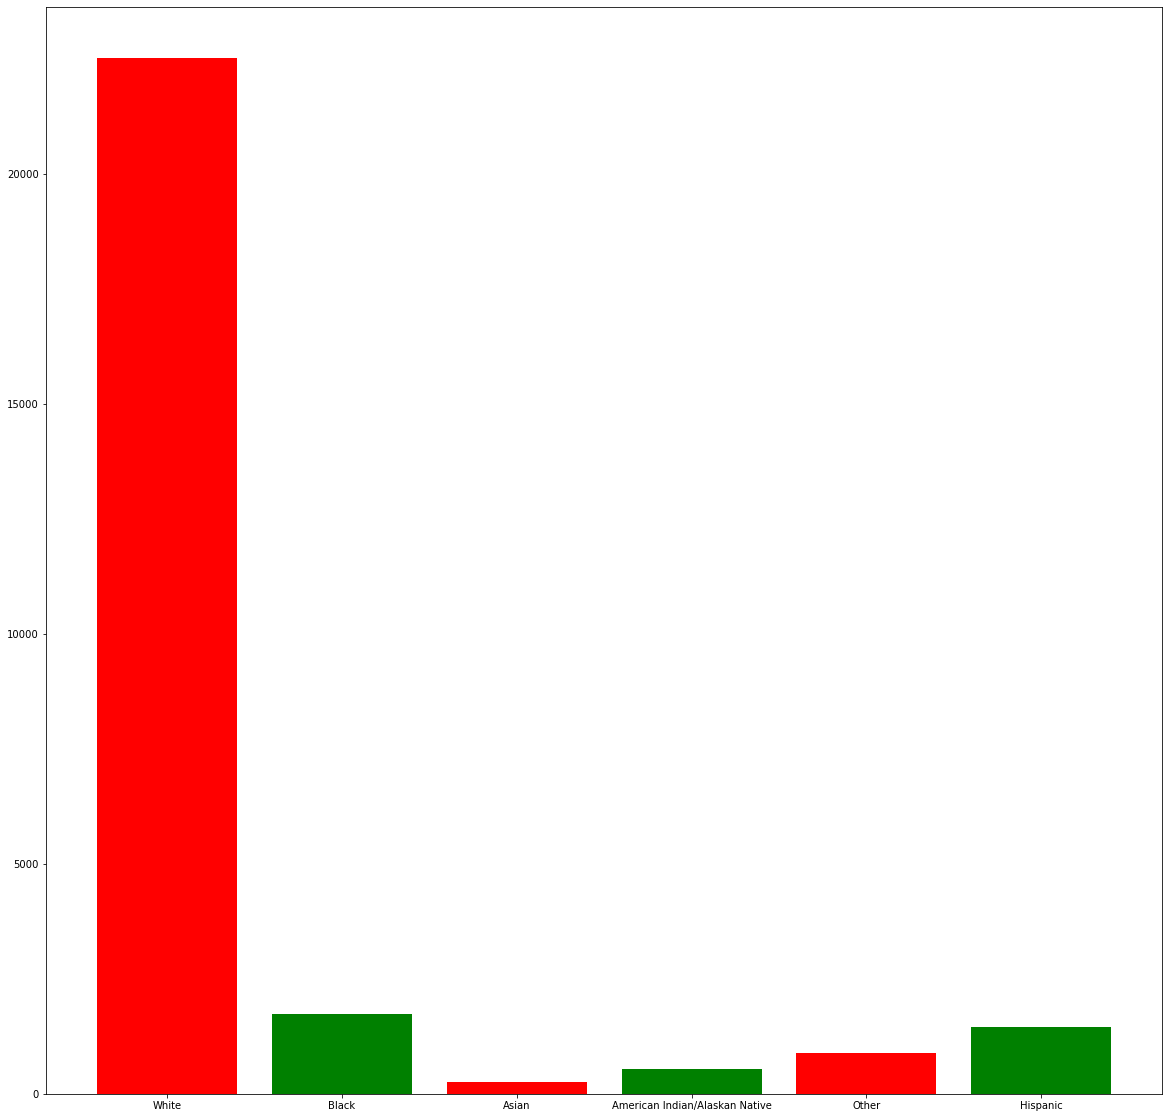

In [13]:
# Race and heart disease connection
per_race = list()
per_race = df_new.Race.unique()
numbers = list()
for race in per_race:
    numbers.append(df_new[df_new.HeartDisease == 1].Race.value_counts()[race])
fig = plt.figure(figsize=(20, 20))
plt.bar(['White' ,'Black' ,'Asian' ,'American Indian/Alaskan Native' ,'Other','Hispanic'], numbers, color=['red', 'green'])

<BarContainer object of 13 artists>

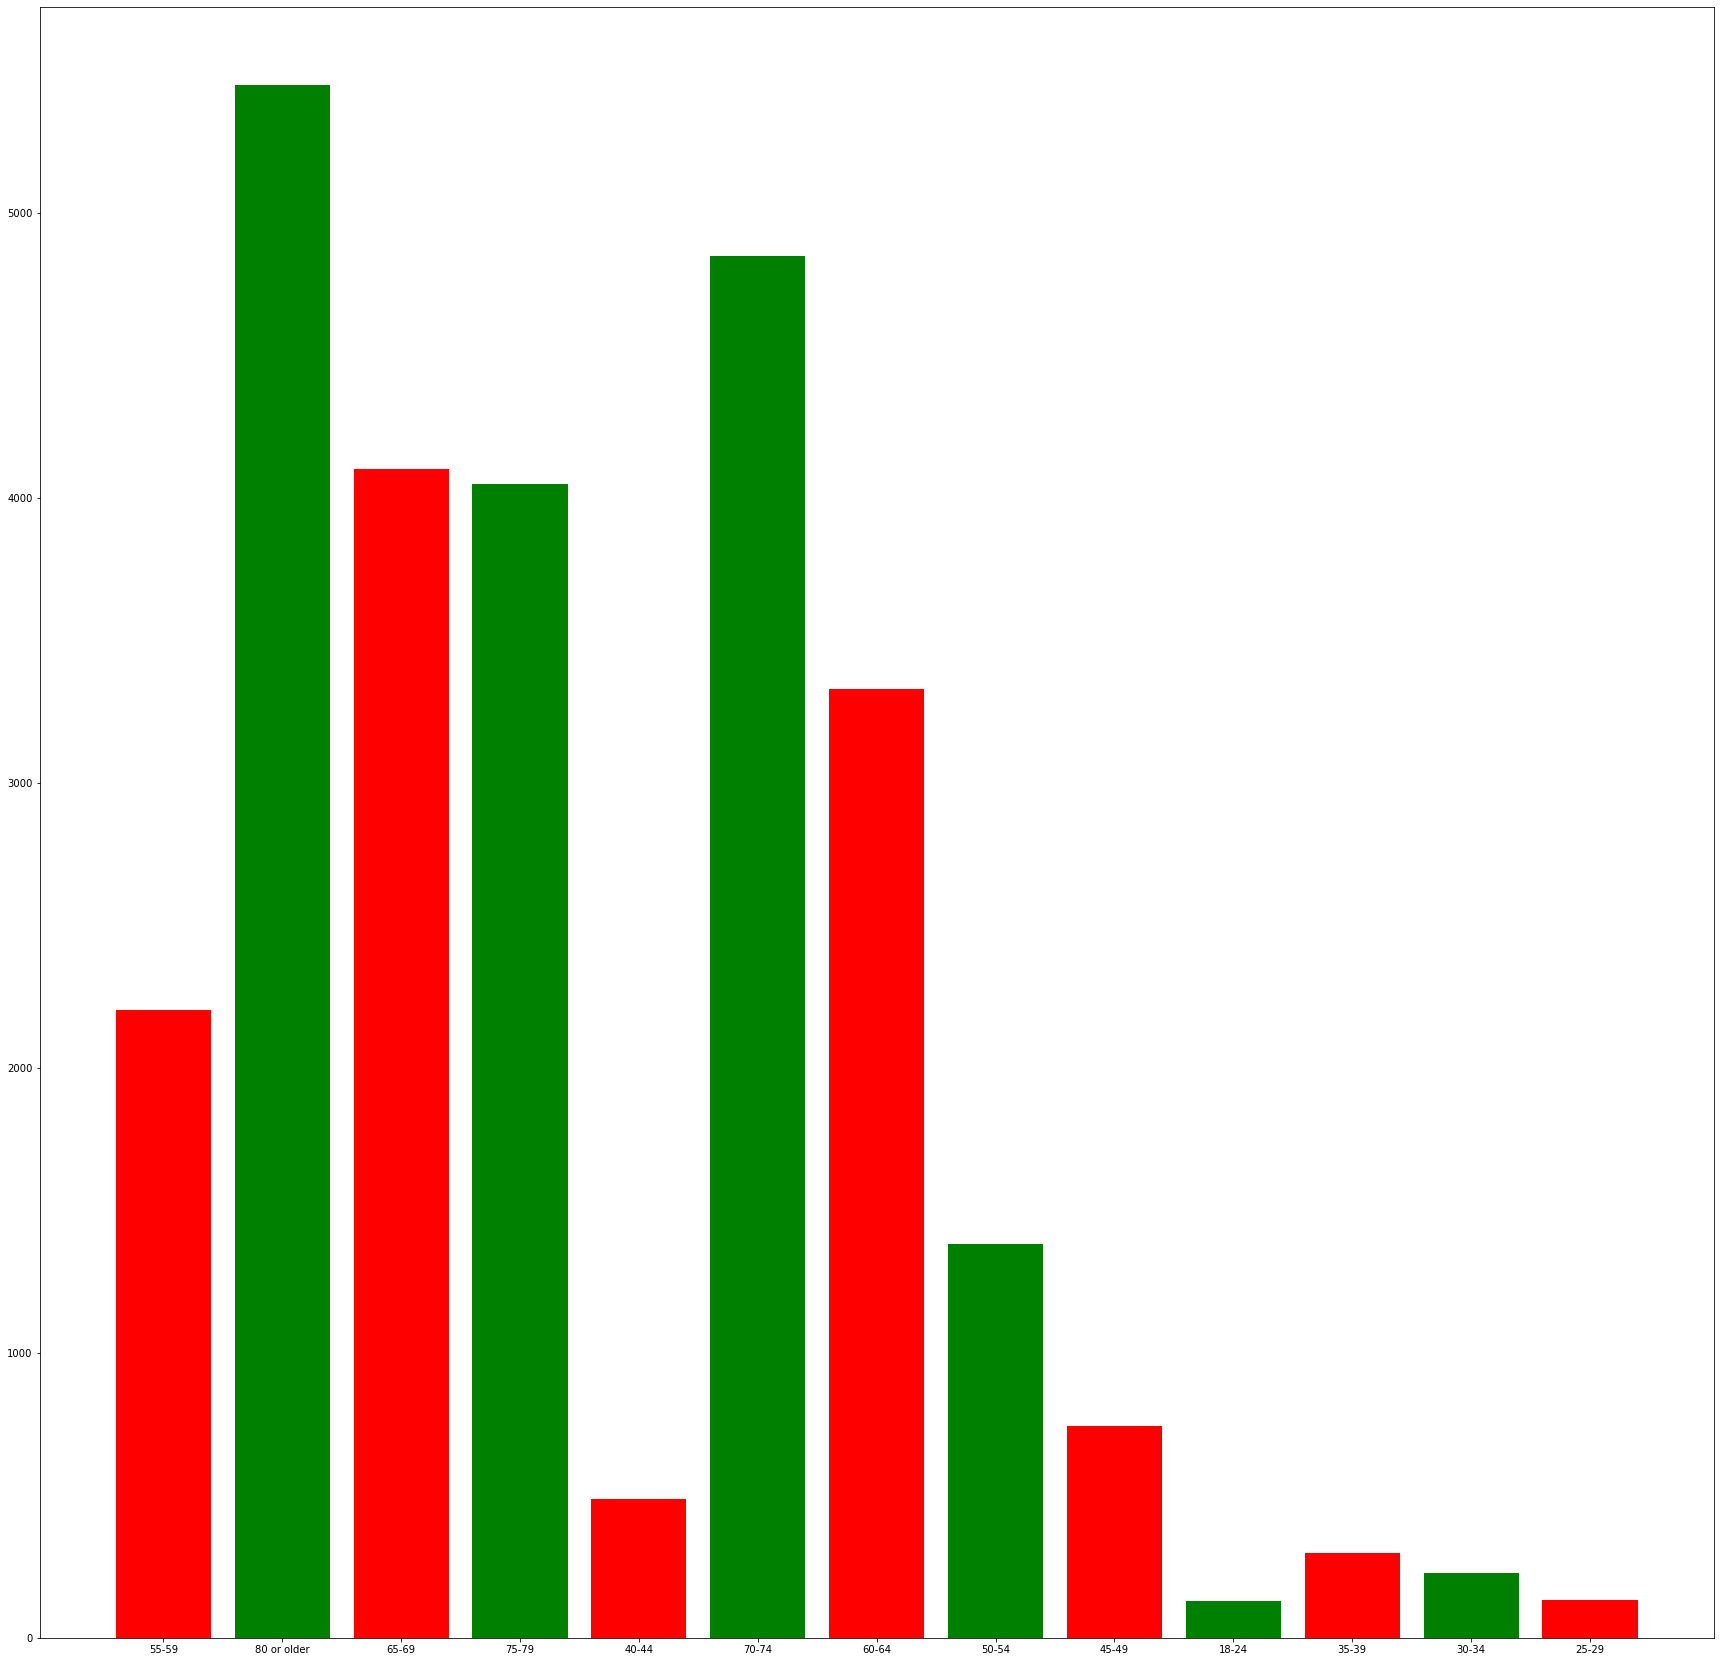

In [14]:
# Age and heart disease connections
per_age = list()
per_age = df_new.AgeCategory.unique()
numbers = list()
for age in per_age:
    numbers.append(df_new[df_new.HeartDisease == 1].AgeCategory.value_counts()[age])
fig = plt.figure(figsize=(30,30))
plt.bar(['55-59' ,'80 or older' ,'65-69', '75-79' ,'40-44' ,'70-74', '60-64' ,'50-54','45-49', '18-24', '35-39' ,'30-34', '25-29'], numbers, color=['red', 'green'])

<BarContainer object of 4 artists>

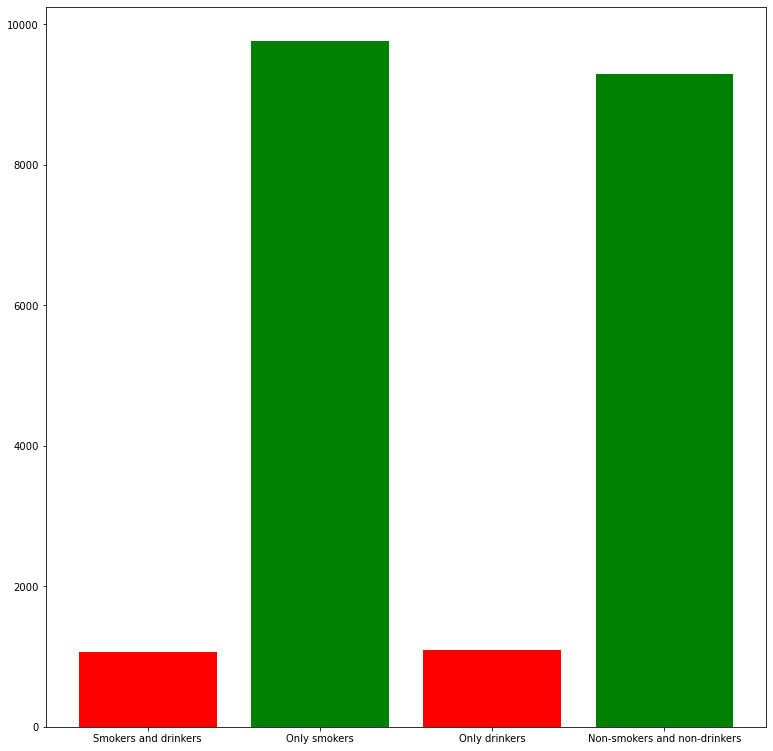

In [15]:
# Smoking and drinking and heart disease connection
numbers = list()
smokers_n_drinkers = df_new[df_new.HeartDisease == 1].Smoking.value_counts()[1] & df_new[df_new.HeartDisease == 1].AlcoholDrinking.value_counts()[1]
numbers.append(smokers_n_drinkers)
smokers_only = df_new[df_new.HeartDisease == 1].Smoking.value_counts()[1] & df_new[df_new.HeartDisease == 1].AlcoholDrinking.value_counts()[0]
numbers.append(smokers_only)
drinkers_only = df_new[df_new.HeartDisease == 1].Smoking.value_counts()[0] & df_new[df_new.HeartDisease == 1].AlcoholDrinking.value_counts()[1]
numbers.append(drinkers_only)
non_drinkers_smokers = df_new[df_new.HeartDisease == 1].Smoking.value_counts()[0] & df_new[df_new.HeartDisease == 1].AlcoholDrinking.value_counts()[0]
numbers.append(non_drinkers_smokers)
fig = plt.figure(figsize=(10, 10))
fig.add_axes([1.0, 1.0, 1.0, 1.0])
plt.bar(['Smokers and drinkers', 'Only smokers', 'Only drinkers', 'Non-smokers and non-drinkers'], numbers, color=['red', 'green'])

There can be visualised a lot of other features and combinations but these are enough for this project

## Train and Test Data

In [16]:
# Importing train_test_split from sklearn to split the dataset into train and test sets
from sklearn.model_selection import train_test_split

In [17]:
# Getting the features from the dataset
X = df_new.iloc[:, :-1]
X

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
0,16.60,1,1,0,0,3.0,30.0,0,0,7,0,1,1,0,5.0,1,0
1,20.34,0,0,0,1,0.0,0.0,0,0,12,0,0,1,0,7.0,0,0
2,26.58,0,1,0,0,20.0,30.0,0,1,9,0,1,1,1,8.0,1,0
3,24.21,1,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0
4,23.71,0,0,0,0,28.0,0.0,1,0,4,0,0,1,0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,0,1,0,0,7.0,0.0,1,1,8,5,1,0,1,6.0,1,0
319791,29.84,0,1,0,0,0.0,0.0,0,1,3,5,0,1,0,5.0,1,0
319792,24.24,0,0,0,0,0.0,0.0,0,0,5,5,0,1,2,6.0,0,0
319793,32.81,0,0,0,0,0.0,0.0,0,0,1,5,0,0,2,12.0,0,0


In [18]:
# Getting the target from the dataset
Y = df_new.iloc[:,-1]
Y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [19]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [20]:
# Looking through the train data
X_train

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
95877,23.33,0,1,0,0,0.0,0.0,0,1,11,0,0,1,0,7.0,0,0
228939,27.46,0,1,0,1,30.0,0.0,0,1,7,0,0,1,2,6.0,0,0
260256,32.69,0,0,0,0,2.0,2.0,0,1,6,5,0,0,0,8.0,0,0
84785,31.32,0,0,0,0,0.0,0.0,0,0,1,0,0,1,4,8.0,0,0
83845,24.63,0,1,0,0,2.0,10.0,0,1,12,0,1,1,2,7.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,29.65,0,0,0,0,0.0,0.0,0,1,8,0,0,0,2,8.0,0,0
259178,42.60,0,1,0,0,0.0,5.0,0,1,3,0,0,1,2,6.0,0,0
131932,31.19,0,1,0,0,12.0,6.0,0,1,9,0,2,0,0,8.0,0,0
146867,22.24,0,0,0,0,7.0,5.0,0,0,0,0,0,1,4,8.0,0,0


In [21]:
Y_train

95877     0
228939    1
260256    0
84785     0
83845     1
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: HeartDisease, Length: 255836, dtype: int64

In [22]:
# Looking through the test data
X_test

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
271884,27.63,0,1,0,0,0.0,25.0,0,0,1,5,0,1,0,7.0,0,0
270361,21.95,1,0,0,0,0.0,20.0,0,0,2,0,0,1,4,6.0,0,0
219060,31.32,0,1,0,0,0.0,0.0,0,0,4,0,0,1,0,6.0,1,0
24010,40.35,0,0,0,0,30.0,0.0,0,0,9,0,0,0,2,8.0,0,0
181930,35.61,1,1,0,0,30.0,30.0,1,0,8,0,0,0,1,4.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181387,28.06,1,1,0,0,0.0,15.0,0,1,12,0,0,1,0,7.0,0,0
13791,29.68,0,1,0,0,7.0,25.0,0,1,3,4,0,0,4,3.0,1,0
180164,21.11,1,0,0,0,4.0,0.0,0,0,3,0,0,1,2,7.0,0,0
94526,23.99,0,0,0,0,0.0,0.0,0,1,10,0,0,1,4,8.0,0,0


In [23]:
Y_test

271884    0
270361    0
219060    0
24010     0
181930    0
         ..
181387    0
13791     0
180164    0
94526     0
107129    0
Name: HeartDisease, Length: 63959, dtype: int64

## Training models and evaluating

In [24]:
# Importing the classifiers from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [25]:
# Importing the metrics from sklearn and cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier

In [26]:
# Calculating k for KNN
import math
k = int(math.sqrt(len(X_train))) 
if k % 2 == 0:
    k = k + 1
print(k)

505


In [27]:
# Training the models, cross validation and testing the models(without ensemble)
clfs = [LogisticRegression(max_iter = 1000, solver = 'newton-cg'), RandomForestClassifier(n_estimators=150), KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean'), XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), GaussianNB()]
clfs_names = ['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 'Naive Bayes']
preds_o = list()
for i in range(len(clfs)):
    clfs[i].fit(X_train, Y_train)
    scores = cross_val_score(clfs[i], X_train, Y_train, cv=10, scoring='f1')
    print("F1 score from cross-validation is: %0.2f (+/- %0.2f) [%s]\n" % (scores.mean(), scores.std(), clfs_names[i]))
    pred = clfs[i].predict(X_test)
    preds_o.append(pred)
    print('Classification report for classifier %s:\n%s\n' % (clfs_names[i], classification_report(Y_test, pred)))
    print('Confusion matrix:\n%s\n' % confusion_matrix(Y_test, pred))

F1 score from cross-validation is: 0.15 (+/- 0.01) [Logistic Regression]

Classification report for classifier Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.08      0.14      5592

    accuracy                           0.91     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.88      0.91      0.88     63959


Confusion matrix:
[[57918   449]
 [ 5131   461]]

F1 score from cross-validation is: 0.17 (+/- 0.01) [Random Forest]

Classification report for classifier Random Forest:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58367
           1       0.35      0.11      0.17      5592

    accuracy                           0.90     63959
   macro avg       0.64      0.55      0.56     63959
weighted avg       0.87      0.90      0.88     63959


Confusion matrix:
[[57177  1190]
 [ 4952  

/home/bojan/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bojan/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/bojan/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report for classifier KNN:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     58367
           1       0.00      0.00      0.00      5592

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.83      0.91      0.87     63959


Confusion matrix:
[[58367     0]
 [ 5592     0]]

F1 score from cross-validation is: 0.16 (+/- 0.01) [XGBoost]

Classification report for classifier XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.53      0.10      0.16      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.54      0.56     63959
weighted avg       0.89      0.91      0.89     63959


Confusion matrix:
[[57873   494]
 [ 5046   546]]

F1 score from cross-validation is: 0.33 (+/- 0.01) [Naive Bayes]

Classification report for cl

In [28]:
# Training, cross validation and testing Ensemble Vote Classifier(hard voting-majority voting)
clfs = [LogisticRegression(max_iter = 1000, solver = 'newton-cg'), RandomForestClassifier(n_estimators=150), KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean'), XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), GaussianNB()]
eclf = EnsembleVoteClassifier(clfs, voting='hard')
eclf.fit(X_train, Y_train)
scores = cross_val_score(eclf, X_train, Y_train, cv=10, scoring='f1')
print("F1 score from cross-validation is: %0.2f (+/- %0.2f) [%s]\n" % (scores.mean(), scores.std(), 'EnsembleVoteClassifier'))
pred = eclf.predict(X_test)
preds_o.append(pred)
print('Classification report for classifier %s:\n%s\n' % ('EnsembleVoteClassifier', classification_report(Y_test, pred)))
print('Confusion matrix:\n%s\n' % confusion_matrix(Y_test, pred))

F1 score from cross-validation is: 0.14 (+/- 0.01) [EnsembleVoteClassifier]

Classification report for classifier EnsembleVoteClassifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.55      0.08      0.14      5592

    accuracy                           0.91     63959
   macro avg       0.73      0.54      0.55     63959
weighted avg       0.89      0.91      0.88     63959


Confusion matrix:
[[57991   376]
 [ 5131   461]]



In [29]:
# Training, cross validation and testing Ensemble Vote Classifier(soft voting)
clfs = [LogisticRegression(max_iter = 1000, solver = 'newton-cg'), RandomForestClassifier(n_estimators=150), KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean'), XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), GaussianNB()]
eclf = EnsembleVoteClassifier(clfs, voting='soft')
eclf.fit(X_train, Y_train)
scores = cross_val_score(eclf, X_train, Y_train, cv=10, scoring='f1')
print("F1 score from cross-validation is: %0.2f (+/- %0.2f) [%s]\n" % (scores.mean(), scores.std(), 'EnsembleVoteClassifier'))
pred = eclf.predict(X_test)
preds_o.append(pred)
print('Classification report for classifier %s:\n%s\n' % ('EnsembleVoteClassifier', classification_report(Y_test, pred)))
print('Confusion matrix:\n%s\n' % confusion_matrix(Y_test, pred))

F1 score from cross-validation is: 0.21 (+/- 0.01) [EnsembleVoteClassifier]

Classification report for classifier EnsembleVoteClassifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58367
           1       0.51      0.13      0.21      5592

    accuracy                           0.91     63959
   macro avg       0.72      0.56      0.58     63959
weighted avg       0.89      0.91      0.89     63959


Confusion matrix:
[[57656   711]
 [ 4845   747]]



The f1 score in most of the cases is awful. That means something isn't right. 
To have better results and more accurate model we need to undersample the dataset.
The problem of undersampling is that we cut a lot of data of the original dataset. Also undersampling is okay if we cut max x1.6 of the data entries, here we cut more of the given ratio. But still we are going to get better results.

## Undersampling Dataset

In [30]:
majority = len(df_new[df_new['HeartDisease'] == 0])
minority = len(df_new[df_new['HeartDisease'] == 1])
print('Majority class: ', majority)
print('Minority class: ', minority)

Majority class:  292422
Minority class:  27373


In [31]:
random_majority = np.random.choice(majority, minority, replace=False)
print('The length of the random majority class: ', len(random_majority))

The length of the random majority class:  27373


In [32]:
minority_idx = df_new[df_new['HeartDisease'] == 1].index
print(minority_idx)

Int64Index([     5,     10,     35,     42,     43,     45,     77,     78,
               101,    127,
            ...
            319708, 319721, 319739, 319758, 319761, 319765, 319767, 319781,
            319786, 319790],
           dtype='int64', length=27373)


In [33]:
undersample = np.concatenate([minority_idx, random_majority])
undersample_df = df_new.loc[undersample]
undersample_df.shape

(54746, 18)

<BarContainer object of 2 artists>

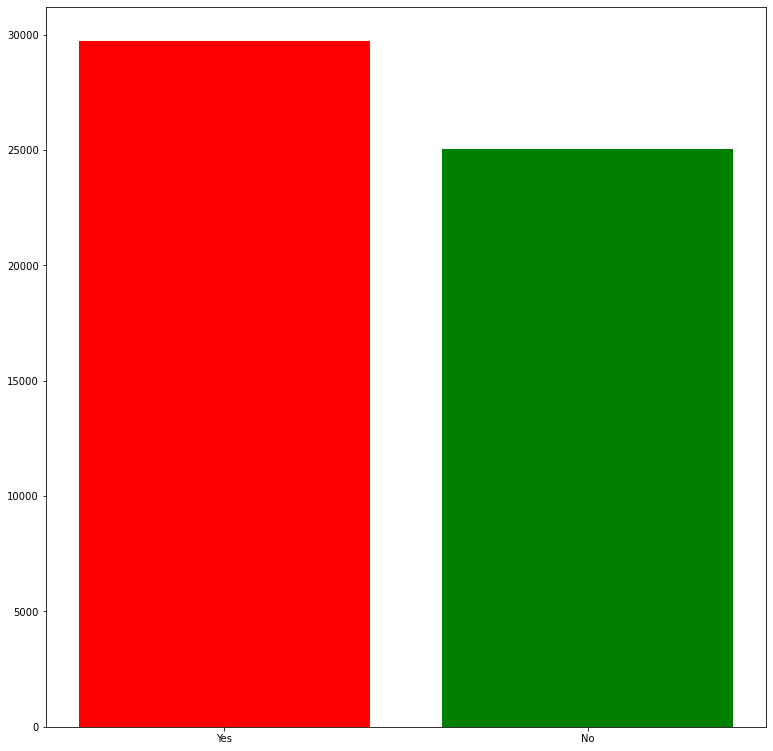

In [34]:
fig = plt.figure(figsize=(10, 10))
fig.add_axes([1.0, 1.0, 1.0, 1.0])
plt.bar(['Yes', 'No'], undersample_df.HeartDisease.value_counts(), color=['red', 'green'])

## Train and Test Data

In [35]:
# Getting the features from the dataset
X = undersample_df.iloc[:, :-1]
X

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
5,28.87,0,1,0,0,6.0,0.0,1,0,11,1,0,0,1,12.0,0,0
10,34.30,0,1,0,0,30.0,0.0,1,1,8,0,1,0,3,15.0,1,0
35,32.98,1,1,0,1,10.0,0.0,1,1,11,0,1,1,3,4.0,0,0
42,25.06,1,0,0,0,0.0,0.0,1,0,12,0,1,0,2,7.0,0,0
43,30.23,0,1,0,0,6.0,2.0,1,0,11,0,1,1,1,8.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191431,34.95,0,1,0,0,0.0,0.0,1,0,9,5,0,0,2,4.0,1,0
88587,18.30,0,1,0,0,0.0,30.0,0,0,0,0,0,0,2,4.0,0,0
140201,20.67,0,0,0,0,0.0,0.0,0,0,5,0,0,1,2,8.0,0,0
215697,32.69,0,1,1,0,7.0,0.0,0,0,5,0,0,1,0,7.0,0,0


In [36]:
# Getting the target from the dataset
Y = undersample_df.iloc[:,-1]
Y

5         1
10        1
35        1
42        1
43        1
         ..
191431    0
88587     0
140201    0
215697    0
216417    0
Name: HeartDisease, Length: 54746, dtype: int64

In [37]:
# Splitting the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [38]:
# Looking through the train data
X_train

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
204894,21.03,0,1,1,0,0.0,0.0,0,0,10,0,0,1,4,7.0,0,0
152818,29.01,0,0,0,0,0.0,0.0,1,1,10,0,1,1,2,8.0,0,0
184867,21.79,0,1,0,0,0.0,0.0,0,1,10,0,0,1,4,8.0,0,0
83845,24.63,0,1,0,0,2.0,10.0,0,1,12,0,1,1,2,7.0,0,0
163889,31.01,0,1,1,0,0.0,0.0,0,1,8,0,0,0,0,8.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83881,22.60,0,0,0,0,0.0,0.0,0,0,6,0,0,1,2,6.0,0,0
188410,28.50,0,1,0,0,0.0,0.0,0,1,12,0,0,1,0,8.0,0,0
104407,27.12,0,1,0,0,0.0,0.0,0,1,11,0,0,1,1,7.0,0,0
8829,23.49,0,1,0,0,5.0,0.0,0,1,12,0,1,1,1,7.0,0,0


In [39]:
Y_train

204894    0
152818    1
184867    0
83845     1
163889    1
         ..
83881     0
188410    0
104407    0
8829      1
183941    1
Name: HeartDisease, Length: 43796, dtype: int64

In [40]:
# Looking through the test data
X_test

,BMI,SkinCancer,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease
156231,37.93,1,1,0,1,0.0,0.0,0,1,10,0,1,1,1,8.0,0,0
179574,22.86,0,0,0,1,0.0,0.0,0,0,10,0,1,1,0,7.0,1,0
130245,34.30,1,0,0,0,0.0,0.0,0,1,11,0,0,1,0,6.0,1,0
154686,28.35,0,1,0,0,0.0,0.0,1,1,12,0,0,1,1,8.0,0,0
316577,25.75,0,0,0,0,0.0,30.0,0,0,8,5,0,0,1,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218001,26.63,0,0,0,0,0.0,0.0,0,0,10,0,0,1,4,8.0,0,1
241708,31.93,0,0,0,0,0.0,2.0,0,0,0,0,0,1,4,6.0,0,0
249969,23.71,0,0,0,1,3.0,0.0,1,1,12,1,0,1,1,12.0,0,1
264113,30.41,0,1,1,1,30.0,0.0,1,1,7,0,0,0,3,8.0,0,0


In [41]:
Y_train

204894    0
152818    1
184867    0
83845     1
163889    1
         ..
83881     0
188410    0
104407    0
8829      1
183941    1
Name: HeartDisease, Length: 43796, dtype: int64

## Training models and evaluating

In [42]:
# Calculating k for KNN
import math
k = int(math.sqrt(len(X_train))) 
if k % 2 == 0:
    k = k + 1
print(k)

209


In [43]:
# Training the models, cross validation and testing the models(without ensemble)
clfs = [LogisticRegression(max_iter = 1000, solver = 'newton-cg'), RandomForestClassifier(n_estimators=150), KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean'), XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), GaussianNB()]
clfs_names = ['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 'Naive Bayes']
preds = list()
for i in range(len(clfs)):
    clfs[i].fit(X_train, Y_train)
    scores = cross_val_score(clfs[i], X_train, Y_train, cv=10, scoring='f1')
    print("F1 score from cross-validation is: %0.2f (+/- %0.2f) [%s]\n" % (scores.mean(), scores.std(), clfs_names[i]))
    pred = clfs[i].predict(X_test)
    preds.append(pred)
    print('Classification report for classifier %s:\n%s\n' % (clfs_names[i], classification_report(Y_test, pred)))
    print('Confusion matrix:\n%s\n' % confusion_matrix(Y_test, pred))

F1 score from cross-validation is: 0.78 (+/- 0.00) [Logistic Regression]

Classification report for classifier Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.69      0.73      5052
           1       0.76      0.82      0.79      5898

    accuracy                           0.76     10950
   macro avg       0.76      0.76      0.76     10950
weighted avg       0.76      0.76      0.76     10950


Confusion matrix:
[[3494 1558]
 [1044 4854]]

F1 score from cross-validation is: 0.79 (+/- 0.01) [Random Forest]

Classification report for classifier Random Forest:
              precision    recall  f1-score   support

           0       0.78      0.69      0.73      5052
           1       0.76      0.83      0.79      5898

    accuracy                           0.77     10950
   macro avg       0.77      0.76      0.76     10950
weighted avg       0.77      0.77      0.77     10950


Confusion matrix:
[[3477 1575]
 [ 979 4919]]



In [44]:
# Training, cross validation and testing Ensemble Vote Classifier(hard voting-majority voting)
clfs = [LogisticRegression(max_iter = 1000, solver = 'newton-cg'), RandomForestClassifier(n_estimators=150), KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean'), XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), GaussianNB()]
eclf = EnsembleVoteClassifier(clfs, voting='hard')
eclf.fit(X_train, Y_train)
scores = cross_val_score(eclf, X_train, Y_train, cv=10, scoring='f1')
print("F1 score from cross-validation is: %0.2f (+/- %0.2f) [%s]\n" % (scores.mean(), scores.std(), 'EnsembleVoteClassifier'))
pred = eclf.predict(X_test)
preds.append(pred)
print('Classification report for classifier %s:\n%s\n' % ('EnsembleVoteClassifier', classification_report(Y_test, pred)))
print('Confusion matrix:\n%s\n' % confusion_matrix(Y_test, pred))

F1 score from cross-validation is: 0.80 (+/- 0.01) [EnsembleVoteClassifier]

Classification report for classifier EnsembleVoteClassifier:
              precision    recall  f1-score   support

           0       0.78      0.70      0.74      5052
           1       0.76      0.84      0.80      5898

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950


Confusion matrix:
[[3523 1529]
 [ 968 4930]]



In [45]:
# Training, cross validation and testing Ensemble Vote Classifier(soft voting)
clfs = [LogisticRegression(max_iter = 1000, solver = 'newton-cg'), RandomForestClassifier(n_estimators=150), KNeighborsClassifier(n_neighbors=k, p=2, metric='euclidean'), XGBClassifier(use_label_encoder=False,eval_metric='mlogloss'), GaussianNB()]
eclf = EnsembleVoteClassifier(clfs, voting='soft')
eclf.fit(X_train, Y_train)
scores = cross_val_score(eclf, X_train, Y_train, cv=10, scoring='f1')
print("F1 score from cross-validation is: %0.2f (+/- %0.2f) [%s]\n" % (scores.mean(), scores.std(), 'EnsembleVoteClassifier'))
pred = eclf.predict(X_test)
preds.append(pred)
print('Classification report for classifier %s:\n%s\n' % ('EnsembleVoteClassifier', classification_report(Y_test, pred)))
print('Confusion matrix:\n%s\n' % confusion_matrix(Y_test, pred))

F1 score from cross-validation is: 0.78 (+/- 0.01) [EnsembleVoteClassifier]

Classification report for classifier EnsembleVoteClassifier:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5052
           1       0.78      0.81      0.79      5898

    accuracy                           0.77     10950
   macro avg       0.77      0.77      0.77     10950
weighted avg       0.77      0.77      0.77     10950


Confusion matrix:
[[3719 1333]
 [1143 4755]]



From the scores, the classification report and confusion matrix we can see that we have more OKAY outcomes when we compare to the ones from the non-undersampled dataset

In [65]:
# Predictions without undersampling of the dataset
clfs_names = ['Logistic Regression', 'Random Forest', 'KNN', 'XGBoost', 'Naive Bayes', 'EnsembleVoteClassifier(hard)', 'EnsembleVoteClassifier(soft)']
predictions_original = pd.DataFrame(preds_o)
predictions_original.index = clfs_names
predictions_original

,0,1,2,3,4,5,6,7,8,9,...,63949,63950,63951,63952,63953,63954,63955,63956,63957,63958
Logistic Regression,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Random Forest,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
KNN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
XGBoost,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
Naive Bayes,0,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
EnsembleVoteClassifier(hard),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
EnsembleVoteClassifier(soft),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
# Predictions with undersampling of the dataset
predictions_undersample = pd.DataFrame(preds)
predictions_undersample.index = clfs_names
predictions_undersample

,0,1,2,3,4,5,6,7,8,9,...,10940,10941,10942,10943,10944,10945,10946,10947,10948,10949
Logistic Regression,1,1,1,1,0,0,0,0,0,1,...,0,1,0,0,1,1,0,1,1,1
Random Forest,1,1,1,1,1,0,0,0,0,1,...,0,0,1,0,1,0,0,1,1,1
KNN,1,0,1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,0,1,1,1
XGBoost,1,1,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,1,1,1
Naive Bayes,1,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,1
EnsembleVoteClassifier(hard),1,1,1,1,1,1,0,0,0,1,...,0,1,0,0,1,0,0,1,1,1
EnsembleVoteClassifier(soft),1,1,1,1,1,0,0,0,0,1,...,1,1,0,0,1,0,0,1,1,1


In [67]:
# Saving the predictions to a csv file
predictions_original.to_csv('predictions_original.csv')
predictions_undersample.to_csv('predictions_undersample.csv')